In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("arshid/iris-flower-dataset")

print("Path to dataset files:", path)

In [4]:
import pandas as pd

# Define the path to the dataset file
dataset_path = "/kaggle/input/iris-flower-dataset/IRIS.csv"

# Load the dataset
iris_data = pd.read_csv(dataset_path)

# Display the first few rows to confirm the data is loaded correctly
print(iris_data.head())


   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [5]:
print(iris_data.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_data['species_encoded'] = label_encoder.fit_transform(iris_data['species'])


In [8]:
# Drop the original non-numeric species column
numeric_data = iris_data.drop(columns=["species"])


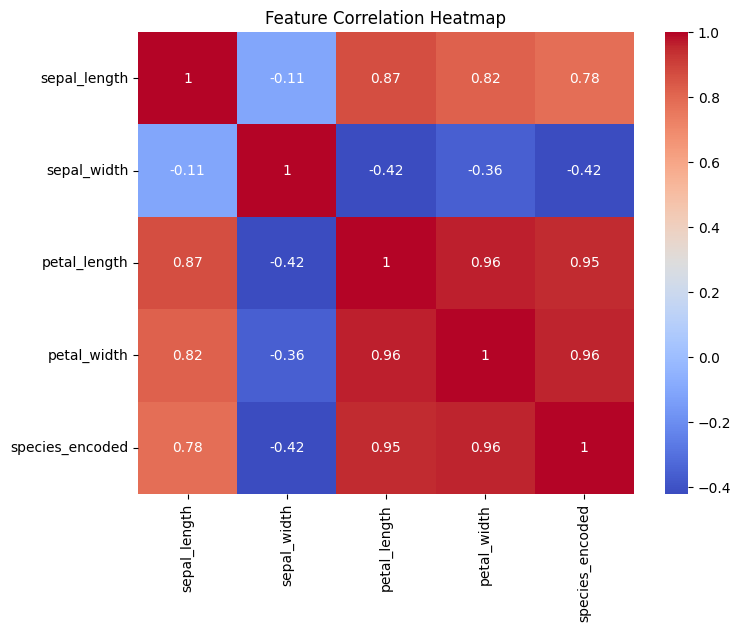

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `numeric_data` is your DataFrame containing numeric columns
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

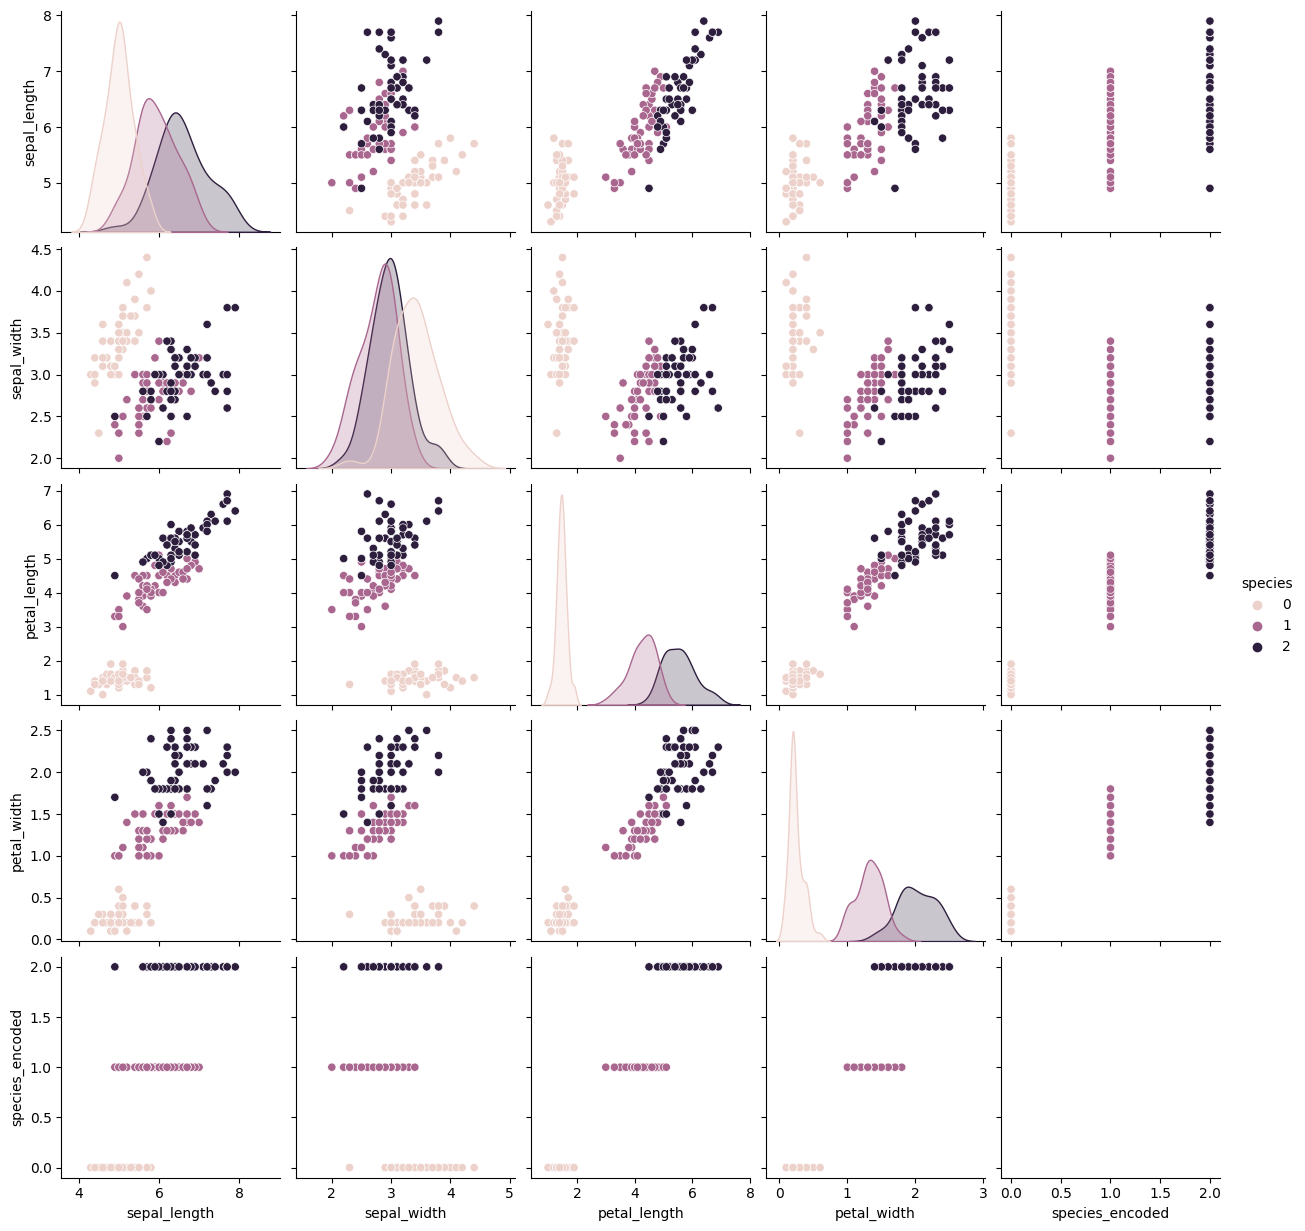

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pair plot for feature relationships
sns.pairplot(iris_data, hue="species")
plt.show()


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])
print("Encoded classes:", label_encoder.classes_)


Encoded classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [14]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = iris_data.drop('species', axis=1)
y = iris_data['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (120, 5)
X_test shape: (30, 5)


In [20]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = iris_data.drop(columns=["species", "species_encoded"])
y = iris_data["species_encoded"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
from sklearn.metrics import classification_report, accuracy_score

# Predictions on the test set
y_pred = dt_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



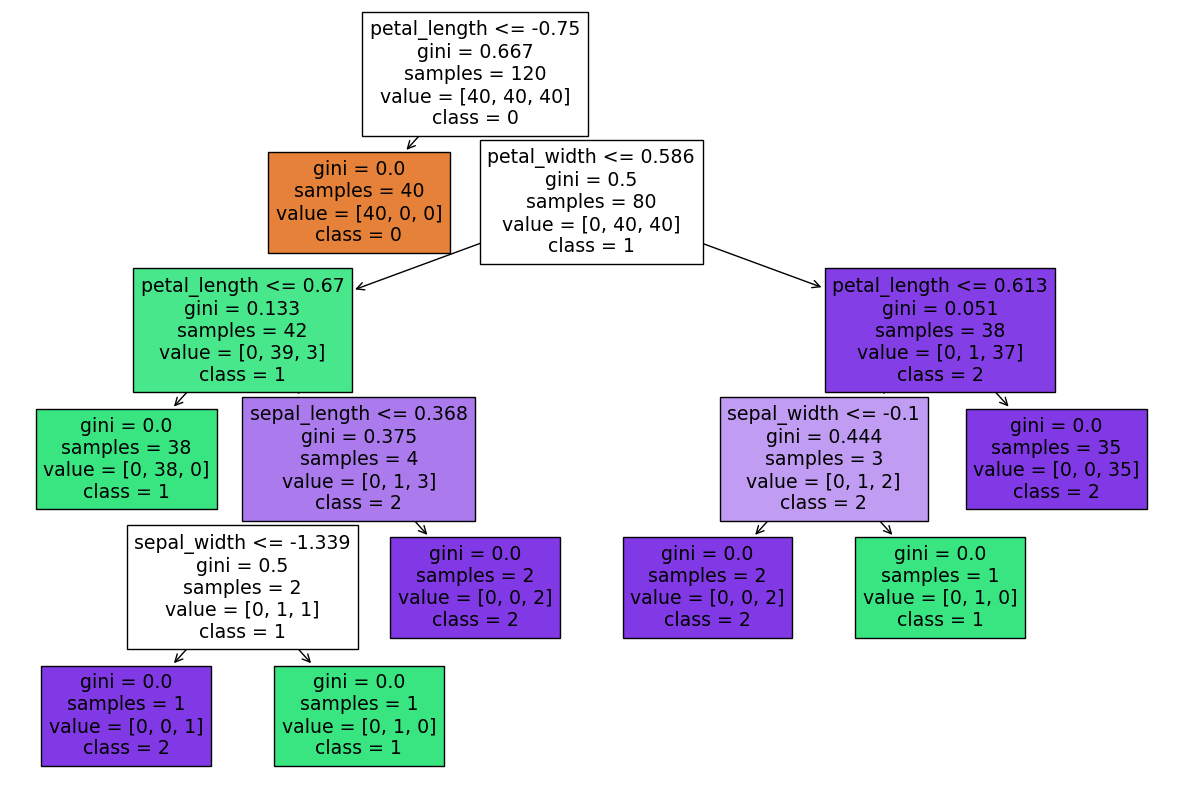

In [25]:
from sklearn.tree import plot_tree

# Ensure class_names are strings
class_names = [str(label) for label in label_encoder.classes_]

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=class_names, filled=True)
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.82      0.90      0.86        10
           2       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



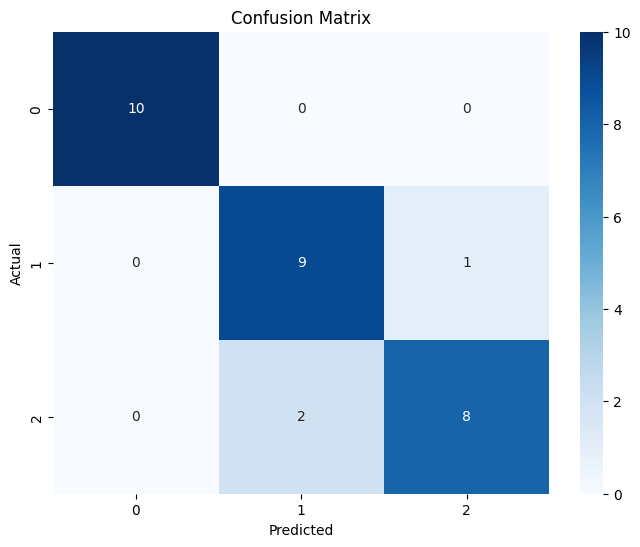

Accuracy: 90.00%


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Predict on test set
y_pred = dt_model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Feature Importance:
        Feature  Importance
2  petal_length    0.558568
3   petal_width    0.406015
1   sepal_width    0.029167
0  sepal_length    0.006250


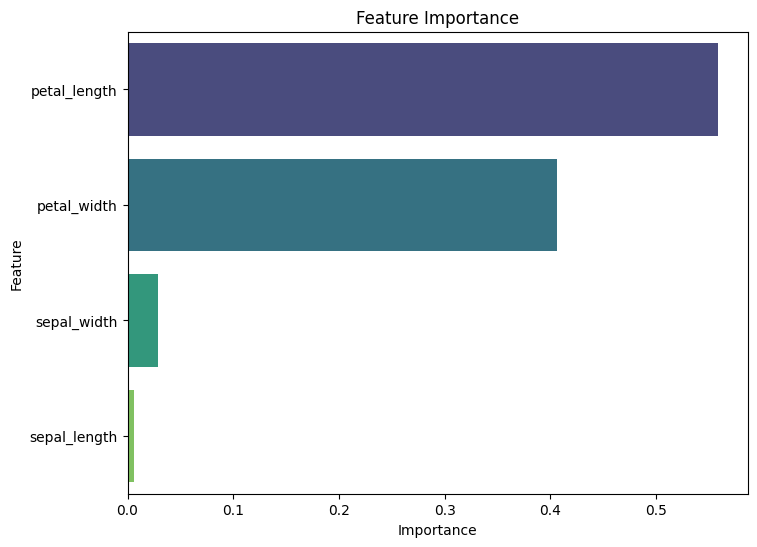

In [27]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate tuned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)
print("Tuned Model Accuracy:", accuracy_score(y_test, y_pred_tuned) * 100)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Tuned Model Accuracy: 90.0


In [29]:
import joblib

# Save the decision tree model
joblib.dump(dt_model, "decision_tree_model.pkl")

# Load the model
loaded_model = joblib.load("decision_tree_model.pkl")


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)

# Logistic Regression
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr) * 100)


Random Forest Accuracy: 90.0
Logistic Regression Accuracy: 93.33333333333333


In [31]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Decision Tree
cv_scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
print("Decision Tree CV Accuracy:", cv_scores.mean() * 100)


Decision Tree CV Accuracy: 95.33333333333334


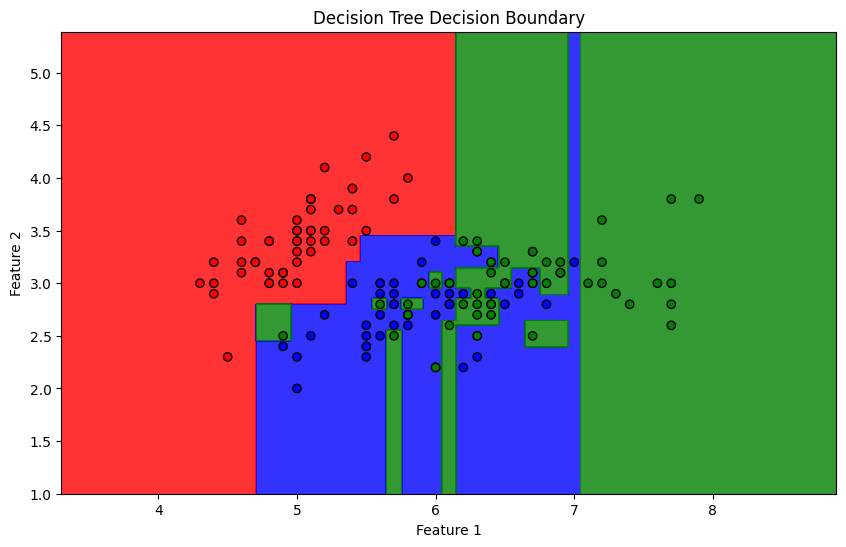

In [32]:
from matplotlib.colors import ListedColormap
import numpy as np

# Visualize decision boundaries (projected onto the first two features)
X_projected = X.iloc[:, :2].values  # Use first two features
y_encoded = label_encoder.transform(y)

dt_model.fit(X_projected, y_encoded)

x_min, x_max = X_projected[:, 0].min() - 1, X_projected[:, 0].max() + 1
y_min, y_max = X_projected[:, 1].min() - 1, X_projected[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = dt_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=ListedColormap(["red", "blue", "green"]))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=y_encoded, edgecolor='k', cmap=ListedColormap(["red", "blue", "green"]))
plt.title("Decision Tree Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [33]:
results = {
    "Decision Tree Accuracy": accuracy,
    "Random Forest Accuracy": accuracy_score(y_test, y_pred_rf) * 100,
    "Logistic Regression Accuracy": accuracy_score(y_test, y_pred_lr) * 100,
}

# Save results
import json
with open("model_results.json", "w") as f:
    json.dump(results, f)

print("Results saved to model_results.json")


Results saved to model_results.json


In [34]:
submission = pd.DataFrame({
    'True_Label': label_encoder.inverse_transform(y_test),
    'Predicted_Label': label_encoder.inverse_transform(y_pred)
})

submission.to_csv("submission.csv", index=False)
print("Submission file saved as submission.csv")


Submission file saved as submission.csv


In [35]:
import joblib

# Save the Decision Tree model
joblib.dump(dt_model, "decision_tree_model.pkl")
print("Model saved as decision_tree_model.pkl")

# To load the model later
# loaded_model = joblib.load("decision_tree_model.pkl")


Model saved as decision_tree_model.pkl
